# Loading and exploring spring parking brake data

## Systembeschreibung

Das zu betrachtende System ist ein Federspeicherbremszylinder, also ein Bremszylinder, der ohne angelegten Luftdruck die Bremse anlegt. Abhängig von der Federspeicherkraft kann das Fahrzeug (bspw. eine Lokomotive mit vier Federspeichern pro Fahrzeug) im Gefälle stationär gehalten werden oder nicht.

Die 24 Federn pro Zylinder verhalten sich näherungsweise linear, weisen jedoch eine recht große Streuung der Federrate auf. Sie sind zusammen mit einigen geometrischen Größen für die Kraft verantwortlich:

- Force/N: gemessene Kraft des Federspeichers
- Deviation $d$/mm: Abweichung der Dicke des Kolben (Abweichung nach unten: weniger Kraft)
- Deviation $h_{1}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Deviation $h_{2}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Dev. $l$/mm: Abweichung der Länge der Kolbenstange (Abweichung nach unten: weniger Kraft)

Zusätzlich haben die Daten noch Datum und Zeit der Messung.

## Aufgabe

Nach dem Auftreten eines Fehlers im Feld (Fahrzeug bricht trotz angelegtem Federspeicher los, Mindestkraft von 18 kN unterschritten) bekommt ihr aus der Produktion eures Unternehmens die Messdaten aus einer Schicht.

Analysiert die Daten und beantwortet die Fragestellungen: 

- Handelt es sich um ein systematisches Problem?
- Wie viele Einheiten sind betroffen?
- Lässt sich das Problem auf einzelne Maße eingrenzen?

In [11]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline

## Data import

In [12]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Time,F,d,h1,h2,l
0,2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
1,2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2,2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
3,2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
4,2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


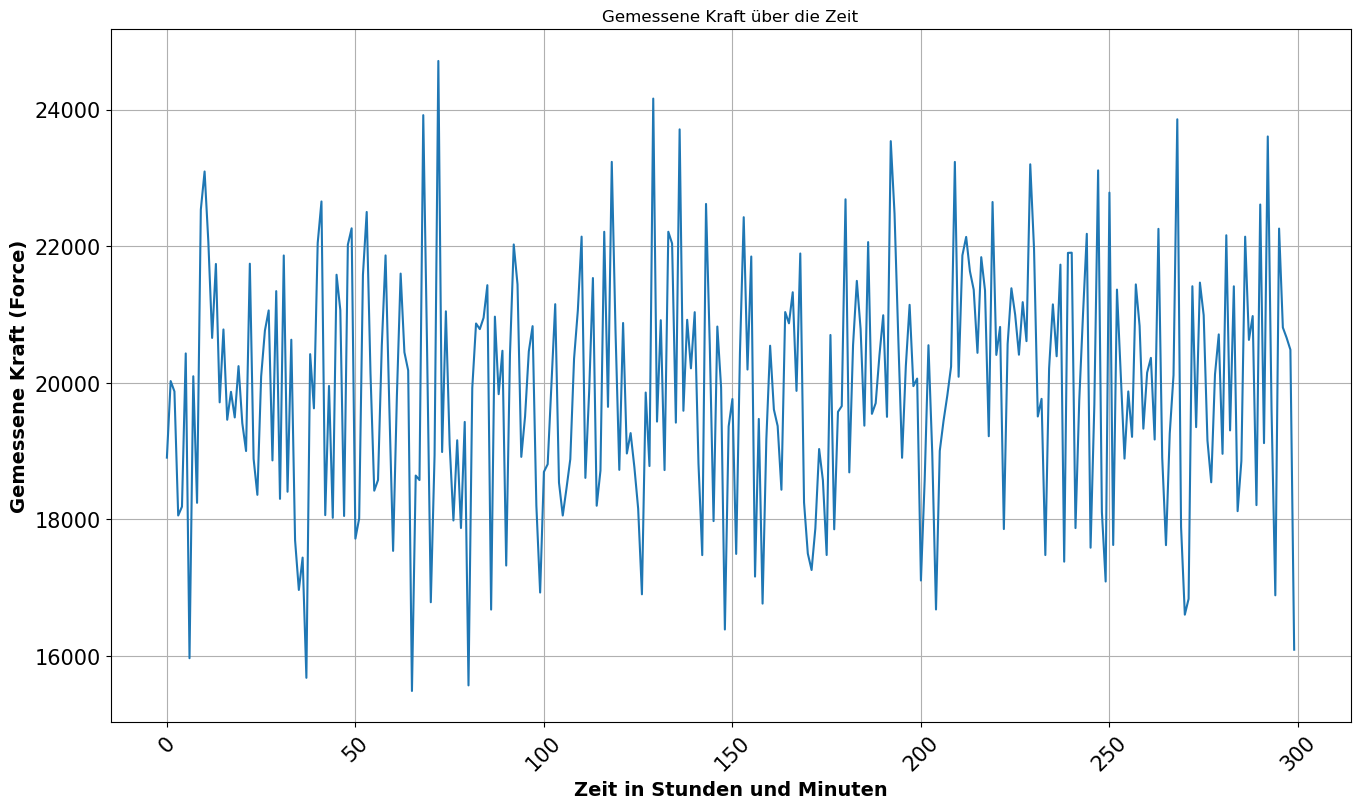

In [13]:
# Transformiere die erste Spalte von String zu DatetimeIndex
df['Time'] = pd.to_datetime(df['Time'])

# Formatiere die Zeit in Stunden und Minuten
df['FormattedTime'] = df['Time'].dt.strftime("%H:%M")

# Plot
plt.figure(figsize=(16, 9))
plt.plot(df['FormattedTime'], df['F'])
plt.title('Gemessene Kraft über die Zeit')

# Achsenbeschriftungen und Skalierung
plt.xlabel("Zeit in Stunden und Minuten", fontsize=14, fontweight="bold")
plt.ylabel("Kraft in N", fontsize=14, fontweight="bold")
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15)
plt.xscale("linear")

plt.ylabel('Gemessene Kraft (Force)')
plt.grid()
plt.show()



In [14]:
#Filterung, filtert alle Kräfte über 18000 N
filtered_df = df.loc[df['F'] <= 18000]
filtered_df_head = filtered_df.head()
print(filtered_df_head)
print(f"Es sind {len(filtered_df['F'])} Messdaten betroffen")


                  Time             F         d        h1        h2         l  \
6  2022-10-26 07:42:00  15969.394445 -0.031502 -0.046969 -0.080410 -0.033441   
34 2022-10-26 08:38:00  17695.840912  0.033534 -0.031506 -0.071098 -0.039592   
35 2022-10-26 08:40:00  16968.687761  0.011802 -0.046347 -0.076916 -0.030570   
36 2022-10-26 08:42:00  17442.243443  0.029513 -0.041646 -0.059912 -0.018266   
37 2022-10-26 08:44:00  15682.401992 -0.031538 -0.044601 -0.087096 -0.042495   

   FormattedTime  
6          07:42  
34         08:38  
35         08:40  
36         08:42  
37         08:44  
Es sind 42 Messdaten betroffen


In [15]:
# Auswahl der relevanten Spalten und aufstellen der Matrix
ausgewaehlte_spalten = filtered_df[['F', 'd', 'h1', 'h2', 'l']]
korrelationen = ausgewaehlte_spalten.corr()

# Ausgabe Matrix
print('Korrelationsmatrix:')
print(korrelationen)

Korrelationsmatrix:
           F         d        h1        h2         l
F   1.000000  0.385353  0.376619  0.717650  0.472845
d   0.385353  1.000000 -0.229947 -0.258342 -0.099895
h1  0.376619 -0.229947  1.000000  0.420282 -0.303893
h2  0.717650 -0.258342  0.420282  1.000000  0.736759
l   0.472845 -0.099895 -0.303893  0.736759  1.000000


## Lineare Regression

In [16]:
import statsmodels.api as sm

# Legt eine abhängige Variable und eine unabhängige Variable fest
abhängige_variable = df["F"]
unabhängige_variablen = df[["d", "h1", "h2", "l"]]

# Füge eine Konstante zu den unabhängigen Variablen hinzu
unabhängige_variablen = sm.add_constant(unabhängige_variablen)

# Erstelle ein (OLS)-Modell
modell = sm.OLS(abhängige_variable, unabhängige_variablen).fit()
print(modell.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3716.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.64e-234
Time:                        18:32:18   Log-Likelihood:                -2115.6
No. Observations:                 300   AIC:                             4239.
Df Residuals:                     296   BIC:                             4254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const           2e+04     16.311   1225.976      0.0

Regressionsergebnisse für d:
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     35.37
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           7.63e-09
Time:                        18:32:18   Log-Likelihood:                -2647.0
No. Observations:                 300   AIC:                             5298.
Df Residuals:                     298   BIC:                             5305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.99e+04  

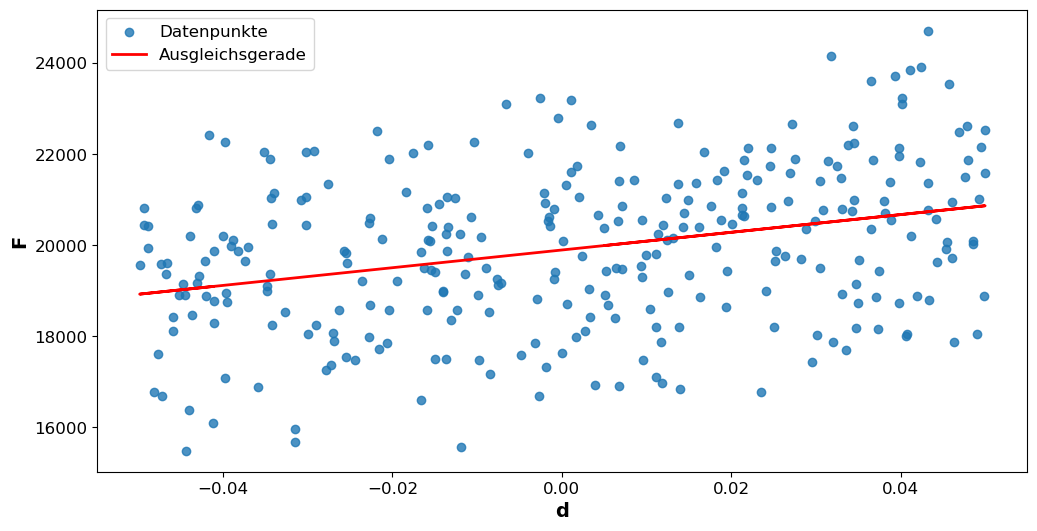

Regressionsergebnisse für h1:
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     239.8
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           4.29e-40
Time:                        18:32:19   Log-Likelihood:                -2575.3
No. Observations:                 300   AIC:                             5155.
Df Residuals:                     298   BIC:                             5162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.001e+04 

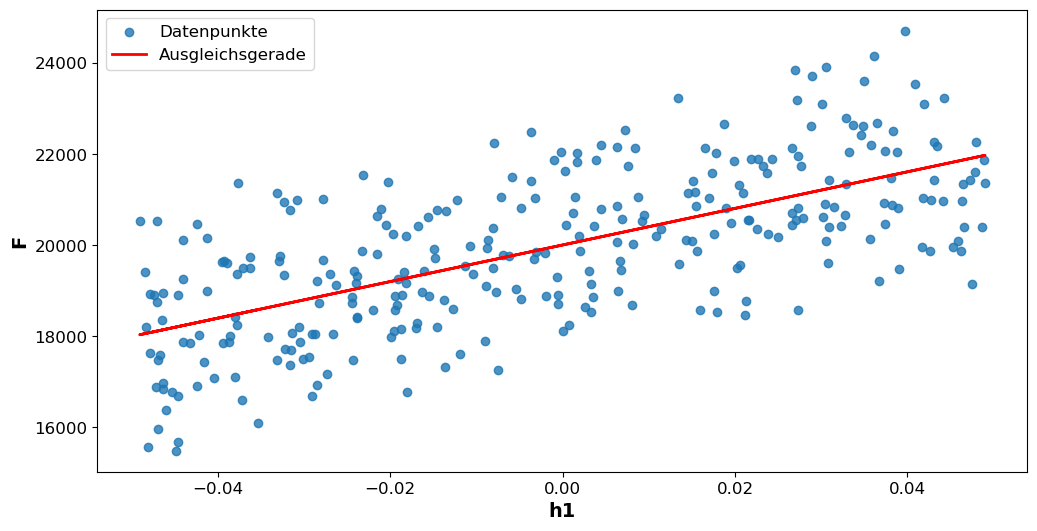

Regressionsergebnisse für h2:
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     2053.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.06e-135
Time:                        18:32:19   Log-Likelihood:                -2354.0
No. Observations:                 300   AIC:                             4712.
Df Residuals:                     298   BIC:                             4719.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.002e+04 

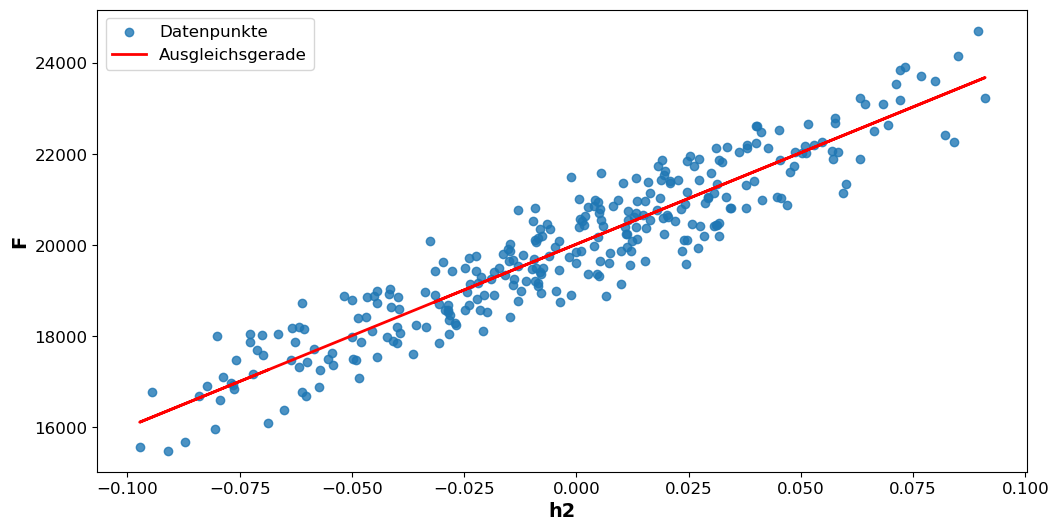

Regressionsergebnisse für l:
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     212.7
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           9.77e-37
Time:                        18:32:19   Log-Likelihood:                -2583.0
No. Observations:                 300   AIC:                             5170.
Df Residuals:                     298   BIC:                             5177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.994e+04  

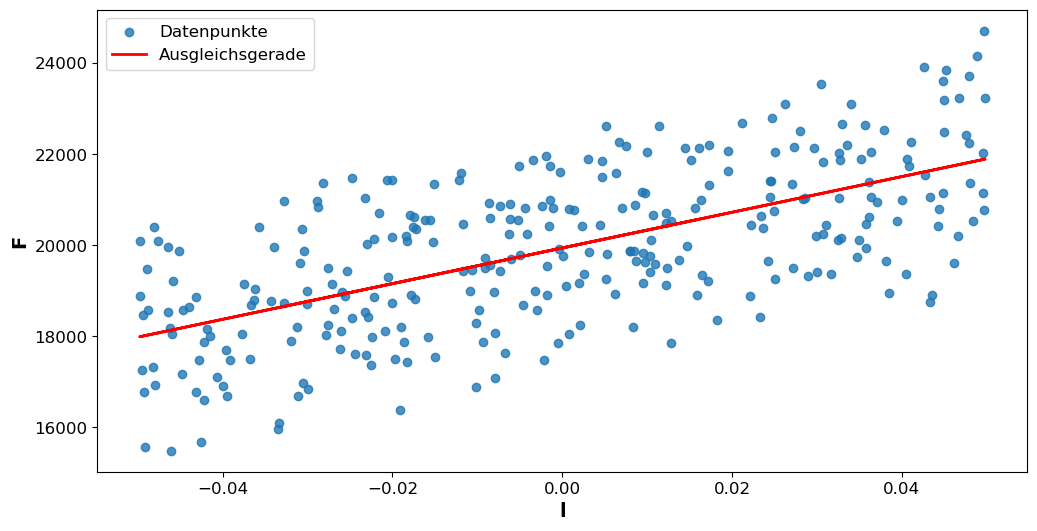

In [17]:
# Legt eine abhängige Variable und eine unabhängige Variable fest
abhängige_variable = df["F"]
unabhängige_variablen = ["d", "h1", "h2", "l"]
# Führe lineare Regression durch
for unabhängige_vari in unabhängige_variablen:
    design_matrix = sm.add_constant(df[unabhängige_vari])
    modell = sm.OLS(abhängige_variable, design_matrix).fit()
    print(f"Regressionsergebnisse für {unabhängige_vari}:\n{modell.summary()}\n")

    # Erstelle einen Scatterplot der Datenpunkte mit Ausgleichsgerade
    plt.figure(figsize=(12, 6))
    plt.scatter(design_matrix[unabhängige_vari], abhängige_variable, label="Datenpunkte", alpha=0.8)
    plt.plot(design_matrix[unabhängige_vari], modell.fittedvalues, color="red", label="Ausgleichsgerade", linewidth=2)
    plt.xlabel(unabhängige_vari, fontsize=14, fontweight="bold")
    plt.ylabel("F", fontsize=14, fontweight="bold")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.show()


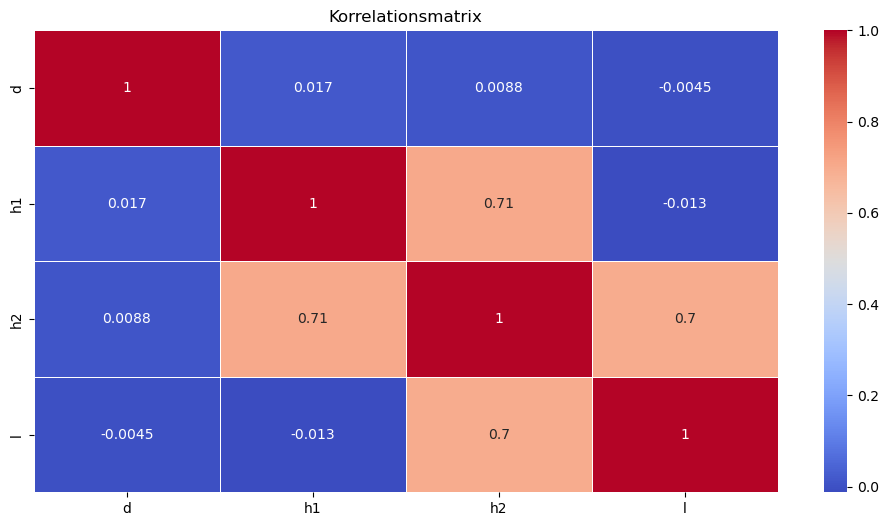

In [18]:
import seaborn as sns

# Extrahiere die relevanten Spalten und berechne die Korrelationsmatrix
variablen_fuer_korrelation = df[["d", "h1", "h2", "l"]]
korrelationsmatrix = variablen_fuer_korrelation.corr()

# Erstelle ein Heatmap-Diagramm mit Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(korrelationsmatrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korrelationsmatrix")
plt.show()

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

# Entfernen Sie die Datums- und Uhrzeitspalte
df = df.drop("FormattedTime", axis=1)
df = df.drop("Time", axis=1)

# Normalisiert die Daten
scaler = MinMaxScaler()
normalisierte_daten = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Definiert die abhängige Variable und die unabhängigen Variablen
unabhängige_variablen = normalisierte_daten[['d', 'h1', 'h2', 'l']]
abhängige_variable = normalisierte_daten['F']

# Fügt eine Konstante zu den unabhängigen Variablen hinzu
unabhängige_variablen_konstante = sm.add_constant(unabhängige_variablen)

# Führt eine lineare Regression durch
regressions_modell = sm.OLS(abhängige_variable, unabhängige_variablen_konstante).fit()
print(regressions_modell.summary())


                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3716.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.64e-234
Time:                        18:32:19   Log-Likelihood:                 623.19
No. Observations:                 300   AIC:                            -1238.
Df Residuals:                     296   BIC:                            -1224.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0405      0.005     -7.396      0.0

# Lineare Regression

Die lineare Regression ist ein statistisches Verfahren zur Modellierung und Untersuchung der Beziehung zwischen einer abhängigen Variable (auch als Zielvariable bezeichnet) und einer oder mehreren unabhängigen Variablen (auch als erklärende Variablen oder Prädiktoren bezeichnet).

## Einfache lineare Regression

In der einfachen linearen Regression mit einer unabhängigen Variable lautet die grundlegende Formel:

\[ Y = \beta_0 + \beta_1X + \varepsilon \]

Dabei repräsentieren die Symbole:

- \( Y \): Die abhängige Variable (zu prognostizierende Variable).
- \( X \): Die unabhängige Variable (zur Vorhersage verwendete Variable).
- \( \beta_0 \): Der Y-Achsenabschnitt (Schnittpunkt der Regressionsgeraden mit der Y-Achse).
- \( \beta_1 \): Der Regressionskoeffizient für die unabhängige Variable (zeigt die Steigung der Regressionsgeraden an).
- \( \varepsilon \): Der Fehlerterm (repräsentiert die Abweichungen zwischen den beobachteten und vorhergesagten Werten).

## Multiple lineare Regression

Für die multiple lineare Regression mit mehreren unabhängigen Variablen lautet die Formel:

\[ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \varepsilon \]

Hier gibt es mehrere unabhängige Variablen \( X_1, X_2, \ldots, X_n \), und es gibt entsprechende Koeffizienten \( \beta_1, \beta_2, \ldots, \beta_n \) für jede unabhängige Variable.

Die lineare Regression schätzt die Werte der Koeffizienten \( \beta_0, \beta_1, \ldots, \beta_n \), sodass die vorhergesagte abhängige Variable \( Y \) am besten zu den beobachteten Daten passt. Das Verfahren beruht auf dem Prinzip der kleinsten Quadrate, bei dem die Summe der quadrierten Residuen minimiert wird, um die besten Schätzungen der Koeffizienten zu erhalten.

---

# Euer Bericht "Mangelnde Federspeicherkraft an Lokomotive ABC-123 während Federspeicherprüfung"

## Fragestellung

## Analyse

## Ergebnis